In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/vgames2.csv'
import pandas as pd

df = pd.read_csv(data)
df.drop('Unnamed: 0',axis =1, inplace=True)
df = df.dropna(subset = ['Year'], axis = 0, how = "any")  
df = df[['Year','Genre','Platform','Name','Publisher', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]

In [ ]:
# year
###### q: year 를 type:date time(%y)로 바꾸고 싶은데 어떻게..? 오류 계속..
df.loc[df['Year'] < 50, 'Year'] += 2000.0
df.loc[df['Year'] < 100 , 'Year'] += 1900.0
df['Year'] = df['Year']
df['Year'].unique()

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000., 1984.,
       1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987., 1982.,
       1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989., 1986.,
       2017., 1980., 2020.])

In [ ]:
dfy = df.sort_values(by='Year', ascending=True)
dfy = dfy.reset_index(drop = True)
dfy.head()

,Year,Genre,Platform,Name,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980.0,Misc,2600,Bridge,Activision,0.25,0.02,0,0
1,1980.0,Shooter,2600,Asteroids,Atari,4,0.26,0,0.05
2,1980.0,Fighting,2600,Boxing,Activision,0.72,0.04,0,0.01
3,1980.0,NaN,2600,Ice Hockey,Activision,0.46,0.03,0,0.01
4,1980.0,Misc,2600,Kaboom!,Activision,1.07,0.07,0,0.01


In [ ]:
# numerical data("_Sales") > K,M 어떻게 처리? > 기준 단위 M(million)이라 가정, K = 1e-3*M 이므로 >> M 은 지우고, K는 *1e-3으로 변경
###### q. 한꺼번에 변경 방법....?
# M
dfy.NA_Sales = dfy.NA_Sales.replace("M","",regex = True)
dfy.EU_Sales = dfy.EU_Sales.replace("M","",regex = True)
dfy.JP_Sales = dfy.JP_Sales.replace("M","",regex = True)
dfy.Other_Sales = dfy.Other_Sales.replace("M","",regex = True)

In [ ]:
# K
#####q. 왜 한꺼번에 같은 창에 두고 apply 하면 오류가 계속 나는지..? 이것도 한꺼번에 하려면 어떻게?? 

def fix(value):
    if 'K' in value:
        return (float(value[:-1]) *1e-3)
    else:
        return float(value)

In [ ]:
dfy.NA_Sales = dfy.NA_Sales.apply(fix)

In [ ]:
dfy.EU_Sales = dfy.EU_Sales.apply(fix)

In [ ]:
dfy.JP_Sales = dfy.JP_Sales.apply(fix)

In [ ]:
dfy.Other_Sales = dfy.Other_Sales.apply(fix)

In [ ]:
dfy.dtypes    
dfy.Genre.unique()

array(['Misc', 'Shooter', 'Fighting', nan, 'Action', 'Platform', 'Puzzle',
       'Sports', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [ ]:
# Genre > null 값은 기타(Misc)로 분류 > type: category 
dfy['Genre'] = dfy['Genre'].fillna('Misc')
dfy.Genre.value_counts()
dfy['Genre'] = dfy['Genre'].astype('category')

In [ ]:
#new_feature: total_sum feature 
dfy['Total_Sales'] = dfy['NA_Sales']+dfy['EU_Sales']+dfy['JP_Sales']+ dfy['Other_Sales']

In [ ]:
#dfy.info() #(16327, 10)
dfy.describe(include = 'all') # include 넣으면  categorical 까지 볼 수 있음
# 상관계수 
#dfy.corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#np.argmax(dfy.NA_Sales)
#np.argmax(dfy.JP_Sales)
#dfy.iloc[6438] # max
#dfy.iloc[906] # jp_max
#dfy.iloc[9190] #min
#np.argmax(dfy.Total_Sales)

In [ ]:
dfy.groupby(['Year'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()

In [ ]:
# 출고량 높은 게임 표, 그림
to = dfy.sort_values(by='Total_Sales', ascending=False).head(30)
#to.plot(x = "Name", y = "Total_Sales", kind = 'bar', color = "skyblue")

# 장르별
g_gt = dfy.groupby(['Genre'])['Total_Sales'].sum()
j = g_gt.sort_values(ascending=False).head(15)
#j.plot(kind="bar", color = "olive")

# 플랫폼별
g_pt = dfy.groupby(['Platform'])['Total_Sales'].sum()
p = g_pt.sort_values(ascending=False).head(30)
#p.plot(kind="bar", color = "grey")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


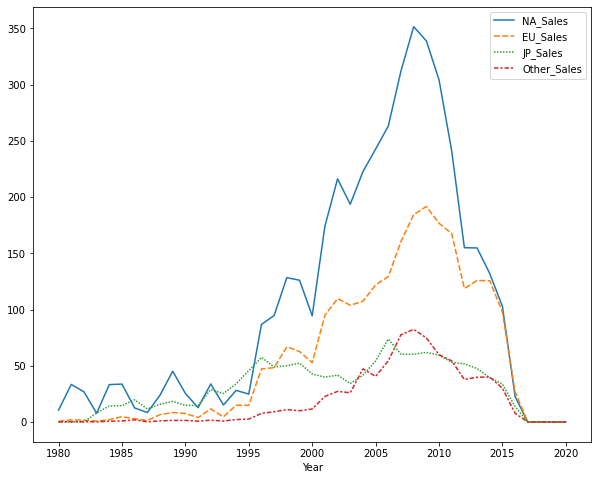

In [ ]:
# 연도별 지역별 출고량 표, 그래프
ysale = dfy.groupby(['Year'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
sns.lineplot(data = ysale)

# figure size 크게 변환
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<BarContainer object of 12 artists>

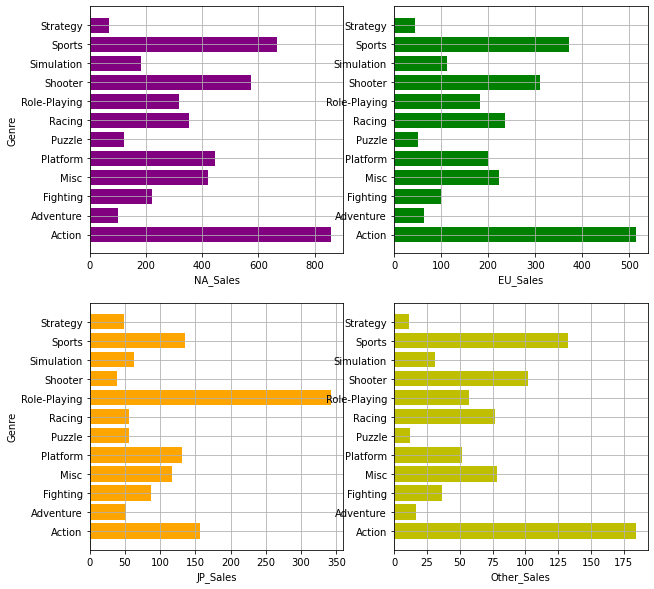

In [ ]:
# 장르별 지역별 출고량 표
gsale = dfy.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
gsale

# 장르별 지역별 출고량 그래프 
####q. 이것도 한꺼번에 어떻게 할 수 있나...? ㅜ
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].grid()
axs[0,0].set_ylabel('Genre')
axs[0,0].set_xlabel('NA_Sales')
axs[0,0].barh(gsale.index,gsale['NA_Sales'], color = 'purple')
axs[0,1].grid()
axs[0,1].set_xlabel('EU_Sales')
axs[0,1].barh(gsale.index,gsale['EU_Sales'],color = 'green' )
axs[1,0].grid()
axs[1,0].set_ylabel('Genre')
axs[1,0].set_xlabel('JP_Sales')
axs[1,0].barh(gsale.index,gsale['JP_Sales'],color = 'orange'  )
axs[1,1].grid()
axs[1,1].set_xlabel('Other_Sales')
axs[1,1].barh(gsale.index,gsale['Other_Sales'],color = 'y' )

In [ ]:
# 장르별 지역별 평균 표, 그림(boxplot)
gmean = dfy.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()

fig, axs = plt.subplots(1, 4, figsize=(10, 10))
axs[0].set_ylabel('Genre')
axs[0].set_xlabel('NA_Sales')
axs[0].set_ylim([0,0.5])
axs[0].boxplot(gmean['NA_Sales'])

axs[1].set_xlabel('EU_Sales')
axs[1].set_ylim([0,0.5])
axs[1].boxplot(gmean['EU_Sales'])

axs[2].set_xlabel('JP_Sales')
axs[2].set_ylim([0,0.5])
axs[2].boxplot(gmean['JP_Sales'])

axs[3].set_xlabel('Other_Sales')
axs[3].set_ylim([0,0.5])
axs[3].boxplot(gmean['Other_Sales'])


In [ ]:
# outlier 제거할까 >>> 안함 
#np.argmax(dfy.NA_Sales)  #6438 = 전체 최대
#dfy.iloc[6438] 
#np.argmax(dfy.JP_Sales)  #906
#dfy.iloc[906] # jp_max
#dfy.iloc[9190] #min

In [ ]:
# 지역에 따라 선호하는 장르 다를까 > 4그룹 비교 > H0: 지역간 선호하는 장르 다르지 않다 > anova 
from scipy import stats
#gsale = dfy.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
F_stat_1, pval_1 = stats.f_oneway(gsale['NA_Sales'],gsale['EU_Sales'],gsale['JP_Sales'],gsale['Other_Sales'])
F_stat_1, pval_1  
print(pval_1)

# p < 0.05 
# H0기각 > 즉, 적어도 한 그룹은 선호하는 장르가 다르다

8.268974008902871e-05


In [ ]:
# 북미, EU 두 지역만 비교하면 
from scipy import stats
stats.ttest_ind(gsale['NA_Sales'],gsale['EU_Sales'])
# p > 0.05  >> 귀무가설 기각하지 않음.그치만 애매..(두 지역 평균 같지않다고는 볼 수 없다)

# chi-squre test
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
#chi2_contingency(gsale['NA_Sales'],gsale['EU_Sales'])
#stats.f_oneway(gsale['NA_Sales'],gsale['EU_Sales'])
#######q. chi2와 anova와 뭐가 다른지 ??

In [ ]:
#북미, 일본의 장르별 출고량 평균 비교_ttest
stats.ttest_ind(gsale['NA_Sales'],gsale['JP_Sales'])
# p <<< 0.05    >> 귀무가설 기각

Ttest_indResult(statistic=3.3932395902554457, pvalue=0.0026131257350247364)

In [ ]:
# 연도별 게임 트렌드? >> 연도-장르 , 연도-플랫폼
# 연도-장르
t_yg = pd.crosstab(dfy['Year'], dfy['Genre'])
t_yg.plot(kind='bar', stacked = True)
rcParams['figure.figsize'] = 10,8

#연도-플랫폼 > 그래프는 정신없음
pd.crosstab(dfy['Year'], dfy['Platform'])


In [ ]:
## 이거 쓸까말까고민중
#장르-플랫폼
#H0: 장르-플랫폼 분포 동일한지
t_gp = pd.crosstab(dfy['Genre'], dfy['Platform'])
# chi-squre test
from scipy.stats import chi2_contingency
p = chi2_contingency(t_gp)[1]
print(p)


0.0
